# Pymaceuticals Inc.
---

### Analysis

First Observation:

It is clear from the box plots that Capomulin and Ramicane are the better performing drug regimens. The tumor sizes have reduced the most for these drugs after the 45 days. Capomulin has a tighter distribution than Ramicane, visible in the box plot where the whickers are closer to the median for Capomulin. Ramicane, although a wider distribution than Capomulin, is the best performing drug in this trial.
There is an outlier with Infubinol which can be considered as an exception as this was the only outlier in the data set. Some other variables or incorrect measurments may be the case and this should be further investigated.

Second Oberservation:

There is a positive correlation between the mouse weight (g) and the average tumor volume. This is further quantified as 0.84 which is very close to 1 and illustrated using the best fit curve. It can be said with a high degree of confidence that as the weight increases, the average tumor volume will increase as well.

Third Observation:

The study is balanced by performing the trials on both genders which eliminates any biases based on sex in this study. More mice were tested with Capomulin and Ramicane thus providing with more samples for a better distribution.
It is interesting to note that, with Capomulin on mouse L509, the tumor size increased before decreasing. This may be because the drug takes time to come into effect. This should be compared to other mice with the same drug and different drugs. Is this the case with all the drugs - there is an increase before a decrease.
 

In [205]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

complete_data_path = "data/Complete_data.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [206]:
# Checking the number of mice.
num_of_unq_mice = len(complete_data_df["Mouse ID"].unique())
num_of_unq_mice


249

In [207]:
# Getting the duplicate_mouse_id mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = complete_data_df[complete_data_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [208]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_data_df[(complete_data_df["Mouse ID"] == duplicate_mouse_id[0])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [209]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = complete_data_df[(complete_data_df["Mouse ID"] != duplicate_mouse_id[0])]
clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [210]:
# Checking the number of mice in the clean DataFrame.
clean_num_of_unq_mice = len(clean_data_df["Mouse ID"].unique())
clean_num_of_unq_mice

248

## Summary Statistics

In [211]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Computations on the Data
pd_mean_tumor_vol = clean_data_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
pd_median_tumor_vol = clean_data_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
pd_var_tumor_vol = clean_data_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
pd_std_tumor_vol = clean_data_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
pd_sem_tumor_vol = clean_data_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Creating the Data Frame
pd_statistics_summary = pd.DataFrame({"Mean Tumor Volume": pd_mean_tumor_vol,
                                    "Median Tumor Volume": pd_median_tumor_vol,
                                    "Tumor Volume Variance": pd_var_tumor_vol,
                                    "Tumor Volume Std. Dev.": pd_std_tumor_vol,
                                    "Tumor Volume Std. Err.": pd_sem_tumor_vol
                                    })

# Outputing the Data Frame
pd_statistics_summary

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6308\1122999176.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd_mean_tumor_vol = clean_data_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6308\1122999176.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd_median_tumor_vol = clean_data_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6308\1122999176.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeri

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [212]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# https://cmdlinetips.com/2019/05/how-to-implement-pandas-groupby-operation-with-numpy/

# Using the aggregation method, produce the same summary statistics in a single line.
# Computations on the Data
np_drug_types = np.array(clean_data_df["Drug Regimen"].unique())
np_tumor_volumes = np.array(clean_data_df["Tumor Volume (mm3)"].values)
np_drug_values = np.array(clean_data_df["Drug Regimen"].values)
np_mean_tumor_vol = [(np.mean(np_tumor_volumes[np_drug_values == i])) for i in np_drug_types]
np_median_tumor_vol = [(np.median(np_tumor_volumes[np_drug_values == i])) for i in np_drug_types]
np_var_tumor_vol = [(np.var(np_tumor_volumes[np_drug_values == i], ddof = 1)) for i in np_drug_types]
np_std_tumor_vol = [(np.std(np_tumor_volumes[np_drug_values == i], ddof = 1)) for i in np_drug_types]
np_sem_tumor_vol = [(st.sem(np_tumor_volumes[np_drug_values == i], ddof = 1)) for i in np_drug_types]

np_statistics_summary_heading = ["Drug Regimen", "mean", "median", "var", "std", "sem"]

np_statistics_summary = [np_drug_types, np_mean_tumor_vol, np_median_tumor_vol, np_var_tumor_vol, np_std_tumor_vol, np_sem_tumor_vol]

np_statistics_summary = np.transpose(np_statistics_summary)

np_statistics_summary_df = pd.DataFrame(data = np_statistics_summary, columns= np_statistics_summary_heading)
np_statistics_summary_df = np_statistics_summary_df.set_index(["Drug Regimen"])
np_statistics_summary_df = np_statistics_summary_df.style.set_caption("Tumor Volume (mm3)")
np_statistics_summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331


## Bar and Pie Charts

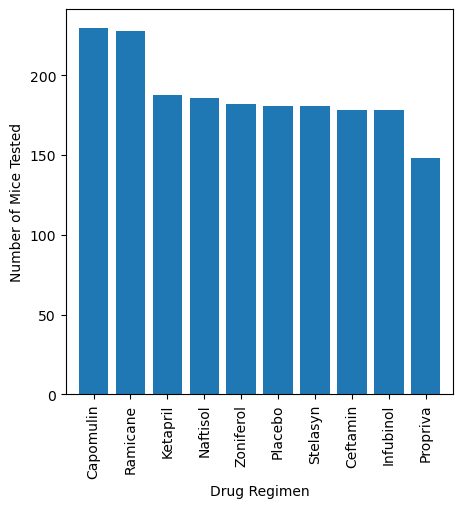

<Figure size 640x480 with 0 Axes>

In [213]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pd_bar_data = pd.DataFrame(clean_data_df.groupby(["Drug Regimen"]).count()["Timepoint"]).sort_values(["Timepoint"], ascending=False)

pd_bar_graph = pd_bar_data.plot(kind="bar", xlabel="Drug Regimen", ylabel="Number of Mice Tested", legend=False, align="center", width = 0.8, figsize=(5,5))
plt.xlim(-0.75, len(pd_bar_data)-0.25)
plt.show()
plt.tight_layout()


<Figure size 500x500 with 0 Axes>

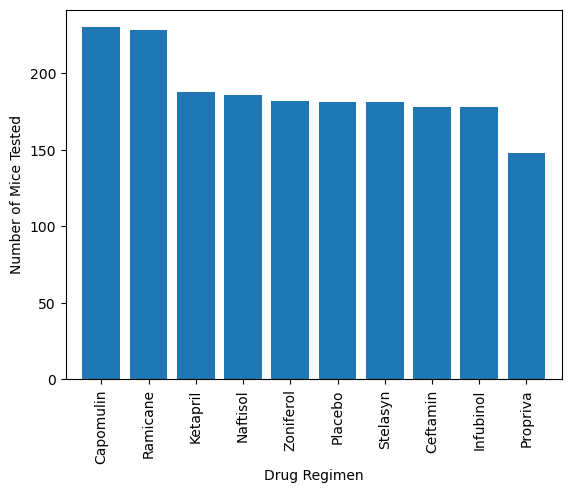

<Figure size 500x500 with 0 Axes>

In [214]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(pd_bar_data.index))
tick_locations = [value for value in x_axis]

y_axis = np.array(pd_bar_data["Timepoint"])

plt.xticks(tick_locations, np.array(pd_bar_data.index), rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xlim(-0.75, len(x_axis)-0.25)

np_bar_graph = plt.bar(x_axis, y_axis, align="center")

plt.figure(figsize=(5,5))


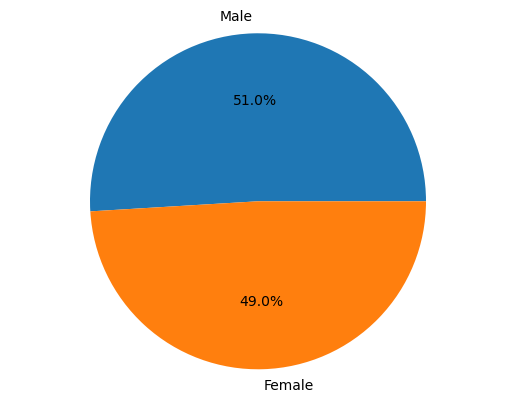

In [215]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pd_pie_data = (pd.DataFrame(clean_data_df["Sex"].value_counts()))

pd_pie_graph = pd_pie_data.plot(kind="pie", y="Sex", autopct="%1.1f%%", legend=False, ylabel="")

plt.axis("equal")
plt.show()


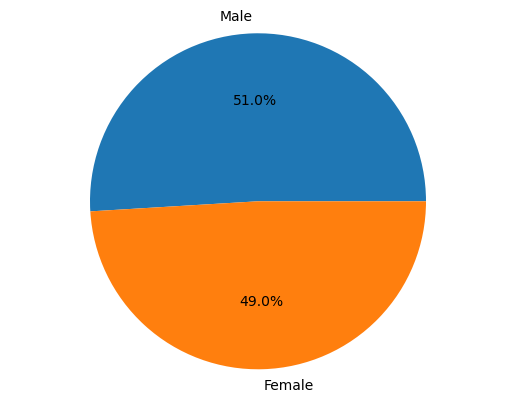

In [216]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = pd_pie_data.index

plt.pie(np.array(pd_pie_data["Sex"]), labels=labels, autopct="%1.1f%%")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [217]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_df = clean_data_df.groupby(["Mouse ID"]).max()["Timepoint"].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data_df = pd.merge(max_tumor_df, clean_data_df)
merged_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [218]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

drugs_tumor_volume = []
drugs_tumor_volume_array = []

# Create empty list to fill with tumor vol data (for plotting)
for drug in drugs:
    drugs_tumor_volume.append(merged_data_df[(merged_data_df["Drug Regimen"] == drug)])
    drugs_tumor_volume_array.append(merged_data_df[(merged_data_df["Drug Regimen"] == drug)]["Tumor Volume (mm3)"])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

drug_quantiles = []
drug_lowerqs = []
drug_upperqs = []
drug_iqrs = []
drug_lower_bounds = []
drug_upper_bounds = []
drug_outliers = []
drug_outliers_array = []

for drug in range(len(drugs)):
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset    
    drug_quantiles.append(drugs_tumor_volume[drug]["Tumor Volume (mm3)"].quantile([.25,.5,.75]))
    drug_lowerqs.append(drug_quantiles[drug][0.25])
    drug_upperqs.append(drug_quantiles[drug][0.75])
    drug_iqrs.append(drug_quantiles[drug][0.75] - drug_quantiles[drug][0.25])

    drug_lower_bounds.append(drug_lowerqs[drug] - (1.5*drug_iqrs[drug]))
    drug_upper_bounds.append(drug_upperqs[drug] + (1.5*drug_iqrs[drug]))
    
    # Determine outliers using upper and lower bounds

    drug_outliers.append(drugs_tumor_volume[drug].loc[(drugs_tumor_volume[drug]["Tumor Volume (mm3)"] < drug_lower_bounds[drug]) | (drugs_tumor_volume[drug]["Tumor Volume (mm3)"] > drug_upper_bounds[drug])])

    drug_outliers_array.append(drug_outliers[drug]["Tumor Volume (mm3)"])

    print(f"{drugs[drug]}'s potential outliers: {drug_outliers_array[drug]}")  

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6308\3551133453.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drugs)


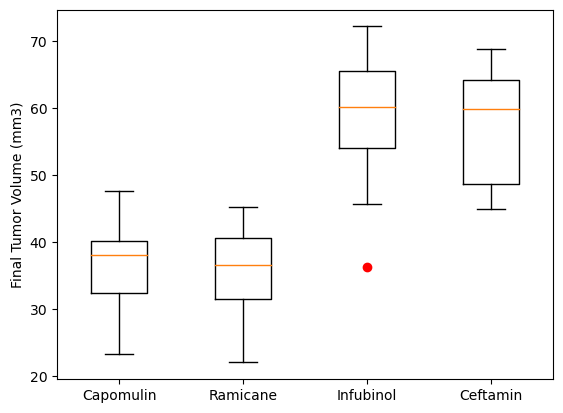

In [219]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# https://www.tutorialspoint.com/plot-multiple-boxplots-in-one-graph-in-pandas-or-matplotlib

# https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(drugs)
ax1.boxplot(drugs_tumor_volume_array, 0, 'ro')
plt.show()  


## Line and Scatter Plots

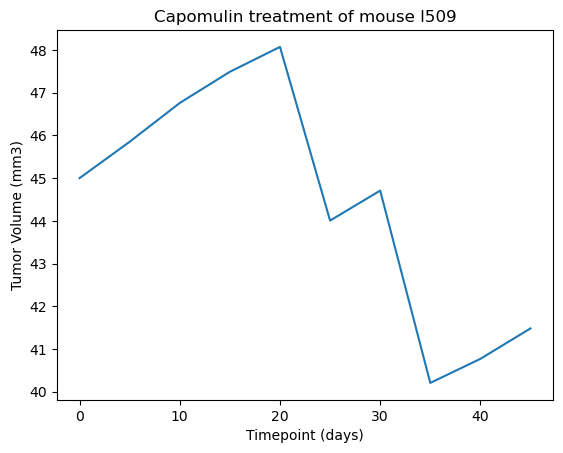

In [220]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis = clean_data_df[(clean_data_df["Mouse ID"] == "l509") & (clean_data_df["Drug Regimen"] == "Capomulin")]["Timepoint"]
y_axis = clean_data_df[(clean_data_df["Mouse ID"] == "l509") & (clean_data_df["Drug Regimen"] == "Capomulin")]["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6308\2331342860.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x_axis = clean_data_df[(clean_data_df["Drug Regimen"] == "Capomulin")].sort_values(["Weight (g)"]).groupby(["Mouse ID"]).mean()["Weight (g)"]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6308\2331342860.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y_axis = clean_data_df[(clean_data_df["Drug Regimen"] == "Capomulin")].sort_values(["Weight (g)"]).groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]


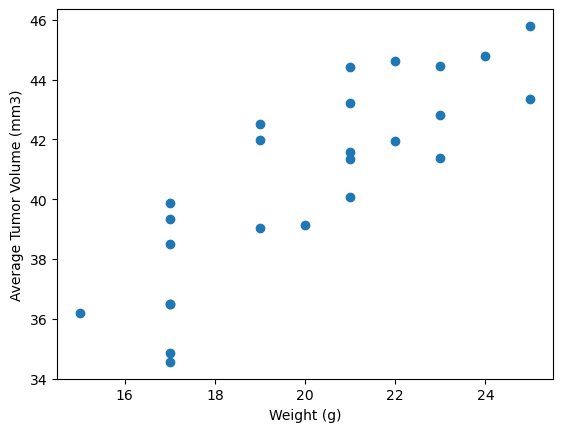

In [221]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_axis = clean_data_df[(clean_data_df["Drug Regimen"] == "Capomulin")].sort_values(["Weight (g)"]).groupby(["Mouse ID"]).mean()["Weight (g)"]
y_axis = clean_data_df[(clean_data_df["Drug Regimen"] == "Capomulin")].sort_values(["Weight (g)"]).groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis, marker="o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


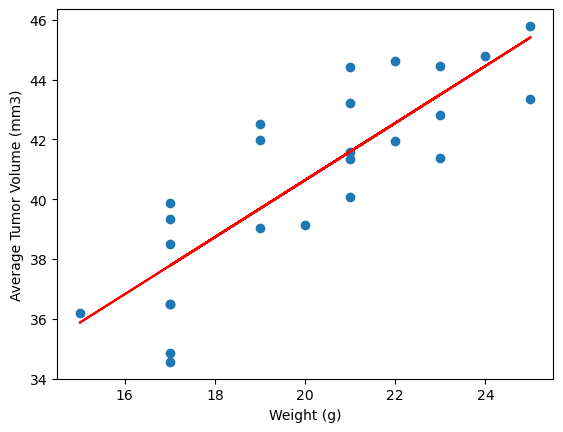

In [222]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coef = round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr_coef}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int



plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis,pe_fit, 'r')
# plt.xticks(x, rotation=90)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
